In [194]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
#importing data-set
df=pd.read_csv("zomato.csv",encoding='latin-1')

In [196]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [197]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [198]:
#Describing the data set and finding the avg. distribution of the data 
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [199]:
#Exploring the data Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [200]:
#Finding Any Missing values present in the data
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [201]:
[i for i in df.columns if df[i].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

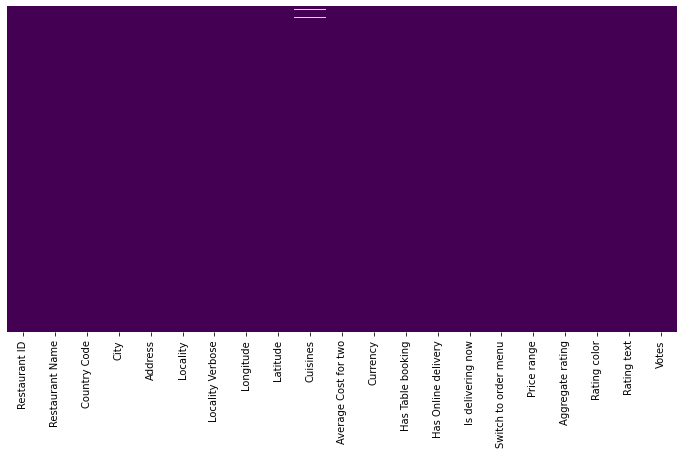

In [202]:
#Creating the heatmap for finding missing values
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [203]:
#importing another data set
df1=pd.read_excel('Country-Code.xlsx')
df1.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [204]:
# combining these two data set 
final_df=pd.merge(df,df1,on='Country Code',how='left')

In [205]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [206]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [207]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

# observation -1
    Most of the users are From India 

In [208]:
Country_name=final_df.Country.value_counts().index
Country_value=final_df.Country.value_counts().values


([<matplotlib.patches.Wedge at 0xd35ecc1460>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

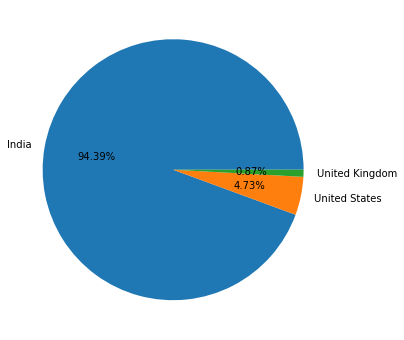

In [209]:
#Creating Pie chart for Top 4 countrys using Zomato.
plt.pie(Country_value[:3],labels=Country_name[:3],autopct="%1.2f%%")

# Observations-2
   - From this Pie chart We can see 94.78% records are from India nad then 4.73% From United States .
   - Zomato Major Business is happening in India.

In [210]:
ratings_df=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating counts'})

In [211]:
ratings_df

,Aggregate rating,Rating color,Rating text,Rating counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation -3 Application Rating
       1- When Raitng is Between 4.5 to 4.9 -----> Excellent
       2- When Raitng is Between 4.0 to 4.5 -----> Very Good
       3- When Raitng is Between 3.5 to 3.9 -----> Good
       4- When Raitng is Between 3.0 to 3.4 -----> Average
       5- When Raitng is Between 2.5 to 2.9 -----> Average
       6- When Raitng is Between 2.0 to 2.4 -----> Poor
       7- When Raitng is 0 -----> Not Rated

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating counts'>

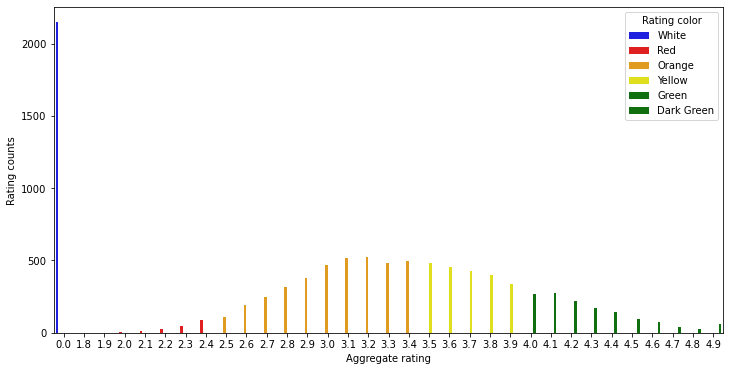

In [212]:
#Creating Bar Plot for the Rating Data
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating counts',data=ratings_df,hue='Rating color',palette=['Blue','Red','Orange','Yellow','Green','Green'])


# Observation -4
    1. Not Rated are very High 
    2. Maximum Ratings are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

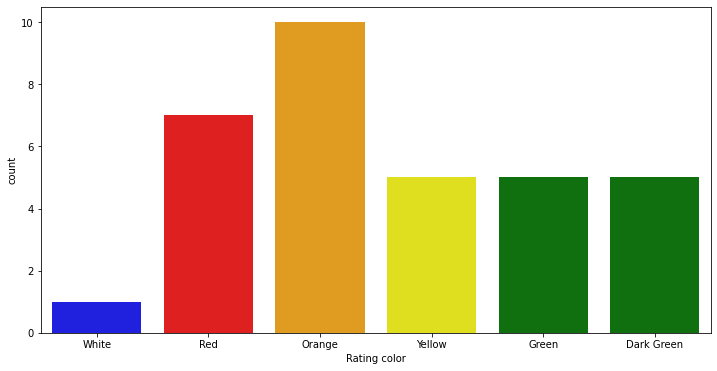

In [213]:
#Count Plot
sns.countplot(x="Rating color",data=ratings_df,palette=['Blue','Red','Orange','Yellow','Green','Green'])

In [214]:
# Doing Some In-dept Analys for the Data-set
#Find the country's name that has given 0 Rating
final_df[final_df['Aggregate rating']==0]['Country'].value_counts().reset_index()

,index,Country
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


# Observations -5
    Maximum Number of 0-Ratings is given by Indian Customers

In [215]:
#Find Out which Currency is used by which country
final_df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'count use'})

,Country,Currency,count use
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [216]:
#Which Countrys have online Delivery Options
final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

# Observation -7 
    Online Deliverys are in India and UAE

([<matplotlib.patches.Wedge at 0xd3601442e0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

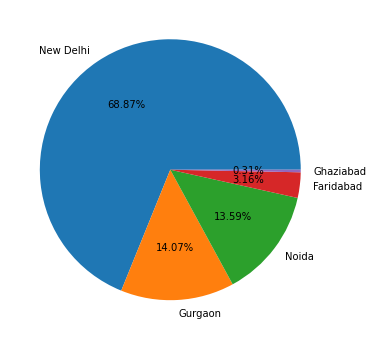

In [217]:
#Creating a pie chart for city's Distributions
City_name=final_df.City.value_counts().index
City_value=final_df.City.value_counts().values
plt.pie(City_value[:5],labels=City_name[:5],autopct="%1.2f%%")

# Observation -8
    Maximum 68.87% no of Orders/Transaction is Done in New Delhi T

In [218]:
#Find the Top 10 'Cuisines'
final_df.Cuisines.value_counts()[:10].reset_index().rename(columns={'index':'Cuisines','Cuisines':'Count'})

,Cuisines,Count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149
